<a href="https://colab.research.google.com/github/denisedsa/Machine-Learning_DIO/blob/main/rede_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [1]:
from google.colab import files
files.upload()  # Faça upload do arquivo `kaggle.json`

KeyboardInterrupt: 

In [2]:
!pip install kaggle


In [5]:
from google.colab import files
files.upload()  # Carregue o arquivo kaggle.json


KeyboardInterrupt: 

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d pratik2901

Missing the required parameter `owner_slug` when calling `metadata_get`


In [8]:
!unzip -q cars-detection.zip -d ./OIP--G4x0LbzPo_vV-m0hWkwswHaLH

unzip:  cannot find or open cars-detection.zip, cars-detection.zip.zip or cars-detection.zip.ZIP.


In [9]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import torch
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [10]:
model = YOLO("yolov8n.pt")  # Ou "yolov8s.pt" para um modelo maior


100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


In [13]:
image_path = "/content/sample_data/Elefante.jpg"
results = model(image_path)


image 1/1 /content/sample_data/Elefante.jpg: 640x448 1 elephant, 39.7ms
Speed: 14.0ms preprocess, 39.7ms inference, 317.2ms postprocess per image at shape (1, 3, 640, 448)


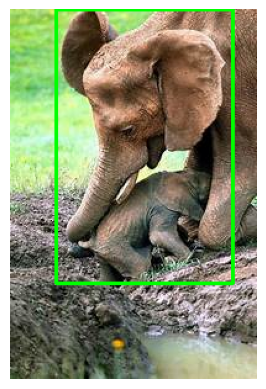

In [14]:
# Carregar imagem original
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Desenhar detecções
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordenadas da bounding box
        conf = box.conf[0]  # Confiança
        cls = int(box.cls[0])  # Classe detectada
        label = f"{model.names[cls]} {conf:.2f}"  # Nome + confiança

        # Desenhar retângulo e texto na imagem
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostrar imagem com detecções
plt.imshow(img)
plt.axis("off")
plt.show()
